### Análises estatísticas do estudo de caso entre os métodos: LightFM (híbrido), GraphSAGE e FastRP

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, friedmanchisquare
import scikit_posthocs as sp
import numpy as np
import json

In [3]:
# Carregar valores de precision e ndcg para o FastRP
with open('fastrp_final_metrics.json', "r", encoding="utf-8") as f:
    fastrp_data = json.load(f)

fastrp_precision_10 = fastrp_data["precision_at_10"]
fastrp_ndcg_10 = fastrp_data["ndcg_at_10"]

fastrp_precision_20 = fastrp_data["precision_at_20"]
fastrp_ndcg_20 = fastrp_data["ndcg_at_20"]

fastrp_precision_50 = fastrp_data["precision_at_50"]
fastrp_ndcg_50 = fastrp_data["ndcg_at_50"]

In [4]:
# Carregar valores de precision e ndcg para o LightFM
with open('lightfm_final_metrics.json', "r", encoding="utf-8") as f:
    lightfm_data = json.load(f)

lightfm_precision_10 = lightfm_data["precision@10"]
lightfm_ndcg_10 = lightfm_data["ndcg@10"]

lightfm_precision_20 = lightfm_data["precision@20"]
lightfm_ndcg_20 = lightfm_data["ndcg@20"]

lightfm_precision_50 = lightfm_data["precision@50"]
lightfm_ndcg_50 = lightfm_data["ndcg@50"]

In [5]:
# Carregar valores de precision e ndcg para o GraphSAGE
with open('../notebooks/graphsage_v2/test_embeddings_runs/topk_per_run/aggregated_precision_ndcg_per_item_across_runs.json', "r", encoding="utf-8") as f:
    graphsage_data = json.load(f)

graphsage_precision_10 = graphsage_data["precision_at_10"]
graphsage_ndcg_10 = graphsage_data["ndcg_at_10"]

graphsage_precision_20 = graphsage_data["precision_at_20"]
graphsage_ndcg_20 = graphsage_data["ndcg_at_20"]

graphsage_precision_50 = graphsage_data["precision_at_50"]
graphsage_ndcg_50 = graphsage_data["ndcg_at_50"]

In [ ]:
# Calcular proporção de valores não nulos e 
# erro-padrão da proporção (SEM) k = 10
def proportion_and_sem(values):
    a = np.asarray(values, dtype=float)
    n = a.size
    nonzeros = np.count_nonzero(a)
    p = nonzeros / n if n > 0 else np.nan
    sem = np.sqrt(p * (1 - p) / n) if n > 0 else np.nan
    return p, sem

for name, arr in [("LightFM@10", lightfm_precision_10),
                  ("FastRP@10", fastrp_precision_10),
                  ("GraphSAGE@10", graphsage_precision_10)]:
    p, sem = proportion_and_sem(arr)
    print(f"{name}: proporção={p:.4f}, sem={sem:.4f}")


LightFM@10: proporção=0.8000, sem=0.0730
FastRP@10: proporção=0.5667, sem=0.0905
GraphSAGE@10: proporção=0.9333, sem=0.0455


In [17]:
# Calcular proporção de valores não nulos e 
# erro-padrão da proporção (SEM) k = 20
def proportion_and_sem(values):
    a = np.asarray(values, dtype=float)
    n = a.size
    nonzeros = np.count_nonzero(a)
    p = nonzeros / n if n > 0 else np.nan
    sem = np.sqrt(p * (1 - p) / n) if n > 0 else np.nan
    return p, sem

for name, arr in [("LightFM@20", lightfm_precision_20),
                  ("FastRP@20", fastrp_precision_20),
                  ("GraphSAGE@20", graphsage_precision_20)]:
    p, sem = proportion_and_sem(arr)
    print(f"{name}: proporção={p:.4f}, sem={sem:.4f}")

LightFM@20: proporção=0.9333, sem=0.0455
FastRP@20: proporção=0.7000, sem=0.0837
GraphSAGE@20: proporção=1.0000, sem=0.0000


In [18]:
# Calcular proporção de valores não nulos e 
# erro-padrão da proporção (SEM) k = 50
def proportion_and_sem(values):
    a = np.asarray(values, dtype=float)
    n = a.size
    nonzeros = np.count_nonzero(a)
    p = nonzeros / n if n > 0 else np.nan
    sem = np.sqrt(p * (1 - p) / n) if n > 0 else np.nan
    return p, sem

for name, arr in [("LightFM@50", lightfm_precision_50),
                  ("FastRP@50", fastrp_precision_50),
                  ("GraphSAGE@50", graphsage_precision_50)]:
    p, sem = proportion_and_sem(arr)
    print(f"{name}: proporção={p:.4f}, sem={sem:.4f}")

LightFM@50: proporção=1.0000, sem=0.0000
FastRP@50: proporção=0.8333, sem=0.0680
GraphSAGE@50: proporção=1.0000, sem=0.0000


In [7]:
data = {
    "precision": {
        10: {"LightFM": lightfm_precision_10, "GraphSAGE": graphsage_precision_10, "FastRP": fastrp_precision_10},
        20: {"LightFM": lightfm_precision_20, "GraphSAGE": graphsage_precision_20, "FastRP": fastrp_precision_20},
        50: {"LightFM": lightfm_precision_50, "GraphSAGE": graphsage_precision_50, "FastRP": fastrp_precision_50},
    },
    "ndcg": {
        10: {"LightFM": lightfm_ndcg_10, "GraphSAGE": graphsage_ndcg_10, "FastRP": fastrp_ndcg_10},
        20: {"LightFM": lightfm_ndcg_20, "GraphSAGE": graphsage_ndcg_20, "FastRP": fastrp_ndcg_20},
        50: {"LightFM": lightfm_ndcg_50, "GraphSAGE": graphsage_ndcg_50, "FastRP": fastrp_ndcg_50},
    }
}

# --- Função para calcular mean e std ---
def mean_std(arr):
    a = np.asarray(arr, dtype=float)
    return float(a.mean()), float(a.std(ddof=0))

# --- Construir DataFrames separados por métrica ---
dfs = {}
for metric, ks in data.items():
    rows = []
    for k, methods in sorted(ks.items()):
        for method, vals in methods.items():
            mu, sigma = mean_std(vals)
            rows.append({"method": method, "k": k, "mean": mu, "std": sigma})
    df = pd.DataFrame(rows)
    # transformar em formato "wide" com MultiIndex columns: (stat, k)
    df_wide = df.pivot(index="method", columns="k")[["mean","std"]]
    # ordenar as colunas por k
    df_wide = df_wide.reorder_levels([1,0], axis=1).sort_index(axis=1, level=0)
    # opcional: ordenar métodos
    df_wide = df_wide.loc[["LightFM","GraphSAGE","FastRP"]]
    dfs[metric] = df_wide

In [37]:
def flatten_stat_df(df_wide):
    """
    Recebe DataFrame com colunas MultiIndex (ambas ordens possíveis) ou colunas simples.
    Retorna DataFrame com colunas planas 'mean@{k}' e 'std@{k}'.
    """
    cols = df_wide.columns
    flat = {}
    if isinstance(cols, pd.MultiIndex):
        # detectar quais níveis correspondem a stat e a k
        level_values = list(cols)
        # tentar ambos os formatos: (stat, k) ou (k, stat)
        for a, b in cols:
            # decidir qual é stat (mean/std) e qual é k (int-like)
            if isinstance(a, str) and a.lower() in {"mean","std"}:
                stat, k = a.lower(), b
            elif isinstance(b, str) and b.lower() in {"mean","std"}:
                stat, k = b.lower(), a
            else:
                # fallback: converter a ou b para string e procurar 'mean'
                if str(a).lower() in {"mean","std"}:
                    stat, k = str(a).lower(), b
                elif str(b).lower() in {"mean","std"}:
                    stat, k = str(b).lower(), a
                else:
                    # último recurso: pular se não reconhecível
                    continue
            try:
                k_int = int(k)
            except Exception:
                # se k não for convertível para int, manter como string
                k_int = k
            colname = f"{stat}@{k_int}"
            flat[colname] = df_wide[(a, b)]
    else:
        # colunas simples: esperar nomes como 'mean@10' ou 'mean_10' ou '10_mean'
        for c in cols:
            s = str(c)
            if "mean" in s.lower() or "std" in s.lower():
                # normalizar: extrair stat e k usando separadores comuns
                for sep in ["@", "_", "-"]:
                    if sep in s:
                        parts = s.split(sep)
                        break
                else:
                    parts = s.replace(" ", "_").split("_")
                # buscar stat e k nas partes
                stat = None; k = None
                for p in parts:
                    if p.lower() in {"mean","std"}:
                        stat = p.lower()
                    else:
                        # tentar converter para int
                        try:
                            k = int(p)
                        except Exception:
                            pass
                if stat is not None and k is not None:
                    colname = f"{stat}@{k}"
                    flat[colname] = df_wide[c]
                else:
                    # ignorar coluna não compatível
                    continue
    flat_df = pd.DataFrame(flat)
    # preservar index do original
    flat_df.index = df_wide.index
    return flat_df

def make_report_table(flat_df, ks=[10,20,50], prefix="Precision"):
    """
    Cria DataFrames:
     - formatted: coluna 'prefix@k' com 'mean ± std (CV%)' (string)
     - means: numeric means per method
     - stds: numeric stds per method
     - cvs: numeric cvs per method
    """
    methods = flat_df.index
    formatted = pd.DataFrame(index=methods)
    means = pd.DataFrame(index=methods)
    stds  = pd.DataFrame(index=methods)
    cvs = pd.DataFrame(index=methods) # Adiciona DataFrame para CV
    for k in ks:
        mean_col = f"mean@{k}"
        std_col = f"std@{k}"
        if mean_col not in flat_df.columns or std_col not in flat_df.columns:
            raise KeyError(f"Colunas esperadas não encontradas: {mean_col} / {std_col}")

        mean_values = flat_df[mean_col].astype(float)
        std_values = flat_df[std_col].astype(float)

        means[f"{prefix}@{k}"] = mean_values
        stds[f"{prefix}@{k}"]  = std_values

        # Calcular Coeficiente de Variação (CV)
        # Evitar divisão por zero para médias próximas de zero
        cv_values = (std_values / mean_values * 100).replace([np.inf, -np.inf], np.nan)
        cvs[f"{prefix}@{k}"] = cv_values

        # Formatar a string incluindo CV
        formatted[f"{prefix}@{k}"] = (mean_values.round(4).astype(str)
                                      + " ± " + std_values.round(4).astype(str)
                                      + " (" + cv_values.round(2).astype(str) + "%)")

    return formatted, means, stds, cvs # Retorna também o DataFrame de CV

# Exemplo de uso (supondo que você já tem dfs["precision"] e dfs["ndcg"] produzidos antes)
prec_flat = flatten_stat_df(dfs["precision"])
ndcg_flat = flatten_stat_df(dfs["ndcg"])

# Atualiza a chamada para receber o DataFrame de CV
prec_formatted, prec_means, prec_stds, prec_cvs = make_report_table(prec_flat, ks=[10,20,50], prefix="Precision")
ndcg_formatted, ndcg_means, ndcg_stds, ndcg_cvs = make_report_table(ndcg_flat, ks=[10,20,50], prefix="NDCG")

# Visualização rápida
print("Precision formatted:\n", prec_formatted)
print("NDCG formatted:\n", ndcg_formatted)

Precision formatted:
                        Precision@10              Precision@20  \
method                                                          
LightFM     0.1667 ± 0.1325 (79.5%)  0.1733 ± 0.1174 (67.75%)   
GraphSAGE  0.1773 ± 0.1539 (86.76%)  0.1617 ± 0.1418 (87.71%)   
FastRP      0.23 ± 0.2818 (122.54%)  0.235 ± 0.2582 (109.89%)   

                       Precision@50  
method                               
LightFM    0.2173 ± 0.1123 (51.66%)  
GraphSAGE  0.1491 ± 0.1218 (81.73%)  
FastRP     0.238 ± 0.2421 (101.71%)  
NDCG formatted:
                             NDCG@10                   NDCG@20  \
method                                                          
LightFM    0.1859 ± 0.1493 (80.28%)  0.1819 ± 0.1297 (71.29%)   
GraphSAGE  0.2011 ± 0.1622 (80.69%)  0.1816 ± 0.1487 (81.88%)   
FastRP     0.3883 ± 0.3844 (98.99%)  0.4293 ± 0.3502 (81.56%)   

                            NDCG@50  
method                               
LightFM    0.2108 ± 0.1161 (55.06%)  
Graph

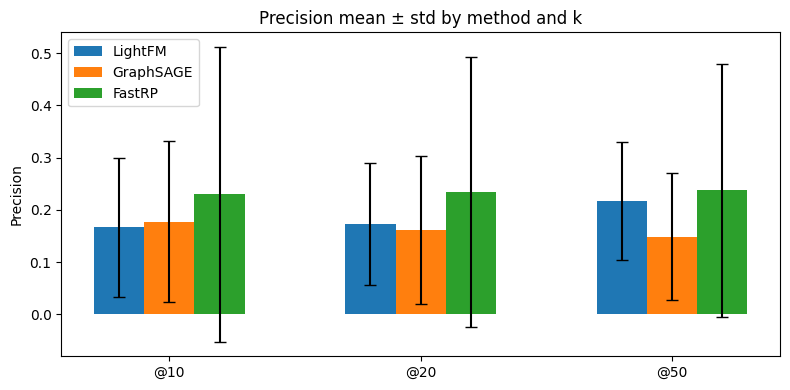

In [38]:
methods = prec_means.index.tolist()
ks = [10,20,50]
means_arr = prec_means[[f"Precision@{k}" for k in ks]].values
stds_arr  = prec_stds[[f"Precision@{k}" for k in ks]].values

x = np.arange(len(ks))
width = 0.2
fig, ax = plt.subplots(figsize=(8,4))
for i, m in enumerate(methods):
    ax.bar(x + (i-1)*width, means_arr[i], width, yerr=stds_arr[i], capsize=4, label=m)
ax.set_xticks(x); ax.set_xticklabels([f"@{k}" for k in ks])
ax.set_ylabel("Precision"); ax.set_title("Precision mean ± std by method and k")
ax.legend(); plt.tight_layout(); plt.show()

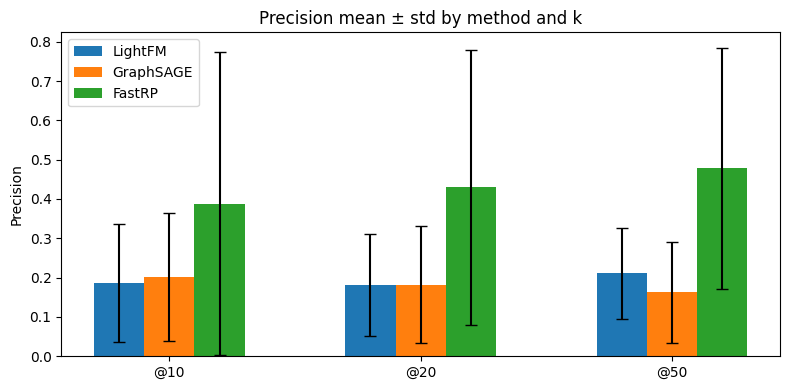

In [39]:
methods = ndcg_means.index.tolist()
ks = [10,20,50]
means_arr = ndcg_means[[f"NDCG@{k}" for k in ks]].values
stds_arr  = ndcg_stds[[f"NDCG@{k}" for k in ks]].values

x = np.arange(len(ks))
width = 0.2
fig, ax = plt.subplots(figsize=(8,4))
for i, m in enumerate(methods):
    ax.bar(x + (i-1)*width, means_arr[i], width, yerr=stds_arr[i], capsize=4, label=m)
ax.set_xticks(x); ax.set_xticklabels([f"@{k}" for k in ks])
ax.set_ylabel("Precision"); ax.set_title("Precision mean ± std by method and k")
ax.legend(); plt.tight_layout(); plt.show()

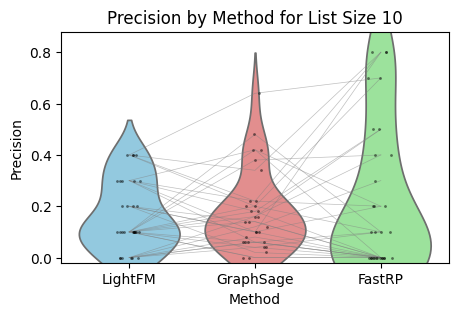

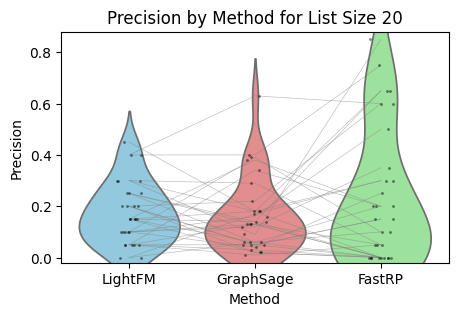

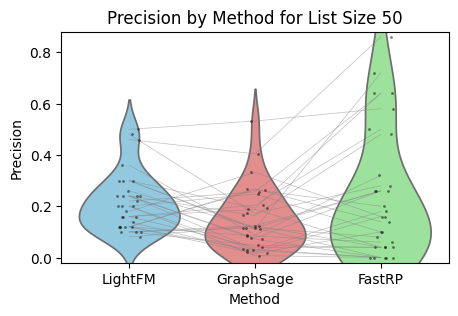

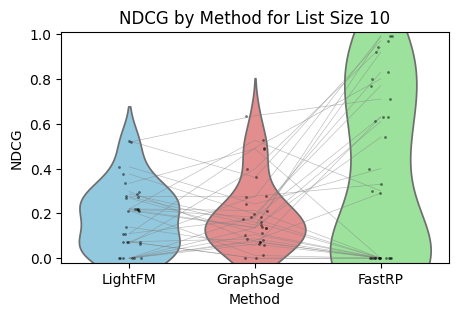

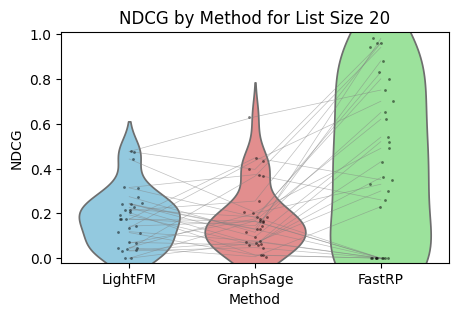

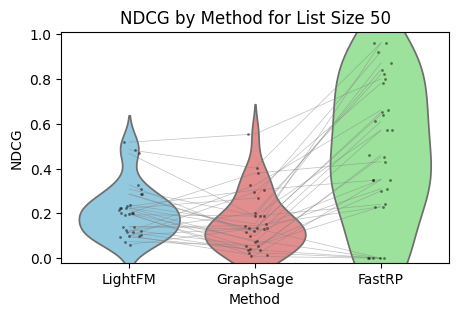

In [40]:
# Combine all precision data into a single DataFrame
precision_data = {
    'LightFM_10': lightfm_precision_10,
    'GraphSage_10': graphsage_precision_10,
    'FastRP_10': fastrp_precision_10,
    'LightFM_20': lightfm_precision_20,
    'GraphSage_20': graphsage_precision_20,
    'FastRP_20': fastrp_precision_20,
    'LightFM_50': lightfm_precision_50,
    'GraphSage_50': graphsage_precision_50,
    'FastRP_50': fastrp_precision_50,
}

precision_df = pd.DataFrame(precision_data)
precision_df = precision_df.melt(var_name='Method_ListSize', value_name='Precision')
precision_df[['Method', 'ListSize']] = precision_df['Method_ListSize'].str.split('_', expand=True)

# Combine all NDCG data into a single DataFrame
ndcg_data = {
    'LightFM_10': lightfm_ndcg_10,
    'GraphSage_10': graphsage_ndcg_10,
    'FastRP_10': fastrp_ndcg_10,
    'LightFM_20': lightfm_ndcg_20,
    'GraphSage_20': graphsage_ndcg_20,
    'FastRP_20': fastrp_ndcg_20,
    'LightFM_50': lightfm_ndcg_50,
    'GraphSage_50': graphsage_ndcg_50,
    'FastRP_50': fastrp_ndcg_50,
}

ndcg_df = pd.DataFrame(ndcg_data)
ndcg_df = ndcg_df.melt(var_name='Method_ListSize', value_name='NDCG')
ndcg_df[['Method', 'ListSize']] = ndcg_df['Method_ListSize'].str.split('_', expand=True)

# Add an ItemID column for connecting points
precision_df['ItemID'] = precision_df.groupby(['Method', 'ListSize']).cumcount()
ndcg_df['ItemID'] = ndcg_df.groupby(['Method', 'ListSize']).cumcount()

# Define a color palette for the methods
method_palette = {'LightFM': 'skyblue', 'GraphSage': 'lightcoral', 'FastRP': 'lightgreen'}

# Set a consistent y-axis limit for Precision plots
precision_ylim = (precision_df['Precision'].min() - 0.02, precision_df['Precision'].max() + 0.02)

# Create the violin plots for Precision
for list_size in precision_df['ListSize'].unique():
    plt.figure(figsize=(5, 3)) # Further reduced figure size
    subset_df = precision_df[precision_df['ListSize'] == list_size]
    sns.violinplot(x='Method', y='Precision', data=subset_df, inner=None, palette=method_palette, hue='Method') # Removed bw_adjust
    sns.stripplot(x='Method', y='Precision', data=subset_df, color='black', size=2, alpha=0.5) # Reduced dot size

    # Connect points for the same ItemID
    for item_id in subset_df['ItemID'].unique():
        item_data = subset_df[subset_df['ItemID'] == item_id]
        plt.plot(item_data['Method'], item_data['Precision'], color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

    plt.ylim(precision_ylim) # Apply consistent y-axis limit
    plt.title(f'Precision by Method for List Size {list_size}') # Simplified title
    plt.show()

# Set a consistent y-axis limit for NDCG plots
ndcg_ylim = (ndcg_df['NDCG'].min() - 0.02, ndcg_df['NDCG'].max() + 0.02)

# Create the violin plots for NDCG
for list_size in ndcg_df['ListSize'].unique():
    plt.figure(figsize=(5, 3)) # Further reduced figure size
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]
    sns.violinplot(x='Method', y='NDCG', data=subset_df, inner=None, palette=method_palette, hue='Method') # Removed bw_adjust
    sns.stripplot(x='Method', y='NDCG', data=subset_df, color='black', size=2, alpha=0.5) # Reduced dot size

    # Connect points for the same ItemID
    for item_id in subset_df['ItemID'].unique():
        item_data = subset_df[subset_df['ItemID'] == item_id]
        plt.plot(item_data['Method'], item_data['NDCG'], color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

    plt.ylim(ndcg_ylim) # Apply consistent y-axis limit
    plt.title(f'NDCG by Method for List Size {list_size}') # Simplified title
    plt.show()

Aparentemente as amostras não apresentam ter distribuição normal, devido aos altos valores de variância, complementados com as análises visuais dos gráficos de violin.
Portanto, é necessário realizar um testes para avaliar a normalidade dos dados, de modo a decidir sobre uso de teste paramétricos ou não paramétricos na avaliação das diferntes entre as amostras pareadas.

In [41]:
# Teste de normalidade Shapiro-Wilk para diferenças pareadas

# Define a list of list sizes
list_sizes = precision_df['ListSize'].unique()

# Dictionary to store Shapiro-Wilk results
shapiro_results = {}

# Perform analysis for Precision
print("Shapiro-Wilk Test Results for Paired Differences (Precision):")
for list_size in list_sizes:
    subset_df = precision_df[precision_df['ListSize'] == list_size]

    # Calculate paired differences for the current list size
    precision_diff_lightfm_graphsage = subset_df[subset_df['Method'] == 'LightFM']['Precision'].values - subset_df[subset_df['Method'] == 'GraphSage']['Precision'].values
    precision_diff_lightfm_fastrp = subset_df[subset_df['Method'] == 'LightFM']['Precision'].values - subset_df[subset_df['Method'] == 'FastRP']['Precision'].values
    precision_diff_graphsage_fastrp = subset_df[subset_df['Method'] == 'GraphSage']['Precision'].values - subset_df[subset_df['Method'] == 'FastRP']['Precision'].values

    # Perform Shapiro-Wilk test
    shapiro_precision_lightfm_graphsage = shapiro(precision_diff_lightfm_graphsage)
    shapiro_precision_lightfm_fastrp = shapiro(precision_diff_lightfm_fastrp)
    shapiro_precision_graphsage_fastrp = shapiro(precision_diff_graphsage_fastrp)

    # Store and print results
    shapiro_results[f'Precision_LightFM_GraphSage_{list_size}'] = shapiro_precision_lightfm_graphsage
    shapiro_results[f'Precision_LightFM_FastRP_{list_size}'] = shapiro_precision_lightfm_fastrp
    shapiro_results[f'Precision_GraphSage_FastRP_{list_size}'] = shapiro_precision_graphsage_fastrp

    print(f"\nList Size {list_size}:")
    print(f"  LightFM - GraphSage: Statistics={shapiro_precision_lightfm_graphsage.statistic:.4f}, p-value={shapiro_precision_lightfm_graphsage.pvalue:.4f}")
    print(f"  LightFM - FastRP: Statistics={shapiro_precision_lightfm_fastrp.statistic:.4f}, p-value={shapiro_precision_lightfm_fastrp.pvalue:.4f}")
    print(f"  GraphSage - FastRP: Statistics={shapiro_precision_graphsage_fastrp.statistic:.4f}, p-value={shapiro_precision_graphsage_fastrp.pvalue:.4f}")

# Perform analysis for NDCG
print("\nShapiro-Wilk Test Results for Paired Differences (NDCG):")
for list_size in list_sizes:
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]

    # Calculate paired differences for the current list size
    ndcg_diff_lightfm_graphsage = subset_df[subset_df['Method'] == 'LightFM']['NDCG'].values - subset_df[subset_df['Method'] == 'GraphSage']['NDCG'].values
    ndcg_diff_lightfm_fastrp = subset_df[subset_df['Method'] == 'LightFM']['NDCG'].values - subset_df[subset_df['Method'] == 'FastRP']['NDCG'].values
    ndcg_diff_graphsage_fastrp = subset_df[subset_df['Method'] == 'GraphSage']['NDCG'].values - subset_df[subset_df['Method'] == 'FastRP']['NDCG'].values

    # Perform Shapiro-Wilk test
    shapiro_ndcg_lightfm_graphsage = shapiro(ndcg_diff_lightfm_graphsage)
    shapiro_ndcg_lightfm_fastrp = shapiro(ndcg_diff_lightfm_fastrp)
    shapiro_ndcg_graphsage_fastrp = shapiro(ndcg_diff_graphsage_fastrp)

    # Store and print results
    shapiro_results[f'NDCG_LightFM_GraphSage_{list_size}'] = shapiro_ndcg_lightfm_graphsage
    shapiro_results[f'NDCG_LightFM_FastRP_{list_size}'] = shapiro_ndcg_lightfm_fastrp
    shapiro_results[f'NDCG_GraphSage_FastRP_{list_size}'] = shapiro_ndcg_graphsage_fastrp

    print(f"\nList Size {list_size}:")
    print(f"  LightFM - GraphSage: Statistics={shapiro_ndcg_lightfm_graphsage.statistic:.4f}, p-value={shapiro_ndcg_lightfm_graphsage.pvalue:.4f}")
    print(f"  LightFM - FastRP: Statistics={shapiro_ndcg_lightfm_fastrp.statistic:.4f}, p-value={shapiro_ndcg_lightfm_fastrp.pvalue:.4f}")
    print(f"  GraphSage - FastRP: Statistics={shapiro_ndcg_graphsage_fastrp.statistic:.4f}, p-value={shapiro_ndcg_graphsage_fastrp.pvalue:.4f}")

Shapiro-Wilk Test Results for Paired Differences (Precision):

List Size 10:
  LightFM - GraphSage: Statistics=0.9538, p-value=0.2132
  LightFM - FastRP: Statistics=0.9360, p-value=0.0711
  GraphSage - FastRP: Statistics=0.9314, p-value=0.0536

List Size 20:
  LightFM - GraphSage: Statistics=0.9527, p-value=0.2001
  LightFM - FastRP: Statistics=0.9256, p-value=0.0375
  GraphSage - FastRP: Statistics=0.9339, p-value=0.0623

List Size 50:
  LightFM - GraphSage: Statistics=0.9643, p-value=0.3971
  LightFM - FastRP: Statistics=0.9150, p-value=0.0199
  GraphSage - FastRP: Statistics=0.9209, p-value=0.0282

Shapiro-Wilk Test Results for Paired Differences (NDCG):

List Size 10:
  LightFM - GraphSage: Statistics=0.9506, p-value=0.1755
  LightFM - FastRP: Statistics=0.9334, p-value=0.0606
  GraphSage - FastRP: Statistics=0.9362, p-value=0.0718

List Size 20:
  LightFM - GraphSage: Statistics=0.9517, p-value=0.1876
  LightFM - FastRP: Statistics=0.9485, p-value=0.1542
  GraphSage - FastRP: Stat

p-valor consistentemente maior que 0.05, ou seja, existe evidências estatísticas suficientes para concluir que os valores não seguem uma distribuição normal.
Deste modo, o mais indicado são testes não paramétricos (como o Friedman e o Nemenyi) para avaliar diferenças nas amostras.

In [42]:
# Teste de Friedman para múltiplos grupos pareados (não paramétrico)

# Define a list of list sizes
list_sizes = precision_df['ListSize'].unique()

# Perform Friedman test for Precision
print("Friedman Test Results (Precision):")
for list_size in list_sizes:
    subset_df = precision_df[precision_df['ListSize'] == list_size]
    lightfm_data = subset_df[subset_df['Method'] == 'LightFM']['Precision'].values
    graphsage_data = subset_df[subset_df['Method'] == 'GraphSage']['Precision'].values
    fastrp_data = subset_df[subset_df['Method'] == 'FastRP']['Precision'].values

    friedman_precision = friedmanchisquare(lightfm_data, graphsage_data, fastrp_data)

    print(f"\nList Size {list_size}: Statistics={friedman_precision.statistic:.4f}, p-value={friedman_precision.pvalue:.4f}")

# Perform Friedman test for NDCG
print("\nFriedman Test Results (NDCG):")
for list_size in list_sizes:
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]
    lightfm_data = subset_df[subset_df['Method'] == 'LightFM']['NDCG'].values
    graphsage_data = subset_df[subset_df['Method'] == 'GraphSage']['NDCG'].values
    fastrp_data = subset_df[subset_df['Method'] == 'FastRP']['NDCG'].values

    friedman_ndcg = friedmanchisquare(lightfm_data, graphsage_data, fastrp_data)

    print(f"\nList Size {list_size}: Statistics={friedman_ndcg.statistic:.4f}, p-value={friedman_ndcg.pvalue:.4f}")

Friedman Test Results (Precision):

List Size 10: Statistics=0.0541, p-value=0.9733

List Size 20: Statistics=0.3652, p-value=0.8331

List Size 50: Statistics=1.9664, p-value=0.3741

Friedman Test Results (NDCG):

List Size 10: Statistics=1.0957, p-value=0.5782

List Size 20: Statistics=4.2000, p-value=0.1225

List Size 50: Statistics=21.6667, p-value=0.0000


Para quase todos os tamanho de listas, as diferenças não apresentaram diferença estatísica. Mas, uma grande diferença foi identificada na lista de NDCG de tamanho 50. Deste modo, é necessário aplicar um teste post hoc Nemeniy.

In [43]:
# Perform Nemenyi post-hoc test for Precision
print("Nemenyi Post-hoc Test Results (Precision):")
for list_size in precision_df['ListSize'].unique():
    subset_df = precision_df[precision_df['ListSize'] == list_size]
    # Reshape the data for scikit-posthocs: ItemID as index, Method as columns
    reshaped_df = subset_df.pivot(index='ItemID', columns='Method', values='Precision')

    # Perform Nemenyi test on the reshaped DataFrame
    # posthoc_nemenyi_friedman expects the data in this format for group comparisons
    nemenyi_precision = sp.posthoc_nemenyi_friedman(reshaped_df)

    print(f"\nList Size {list_size}:")
    display(nemenyi_precision)

# Perform Nemenyi post-hoc test for NDCG
print("\nNemenyi Post-hoc Test Results (NDCG):")
for list_size in ndcg_df['ListSize'].unique():
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]
    # Reshape the data for scikit-posthocs: ItemID as index, Method as columns
    reshaped_df = subset_df.pivot(index='ItemID', columns='Method', values='NDCG')

    # Perform Nemenyi test on the reshaped DataFrame
    nemenyi_ndcg = sp.posthoc_nemenyi_friedman(reshaped_df)

    print(f"\nList Size {list_size}:")
    display(nemenyi_ndcg)

Nemenyi Post-hoc Test Results (Precision):

List Size 10:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.979539,1.000000
GraphSage,0.979539,1.000000,0.979539
LightFM,1.000000,0.979539,1.000000



List Size 20:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.979539,0.920652
GraphSage,0.979539,1.000000,0.830322
LightFM,0.920652,0.830322,1.000000



List Size 50:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.920652,0.596988
GraphSage,0.920652,1.000000,0.364502
LightFM,0.596988,0.364502,1.000000



Nemenyi Post-hoc Test Results (NDCG):

List Size 10:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.596988,0.718650
GraphSage,0.596988,1.000000,0.979539
LightFM,0.718650,0.979539,1.000000



List Size 20:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.128493,0.268023
GraphSage,0.128493,1.000000,0.920652
LightFM,0.268023,0.920652,1.000000



List Size 50:


,FastRP,GraphSage,LightFM
FastRP,1.000000,0.000019,0.003576
GraphSage,0.000019,1.000000,0.400231
LightFM,0.003576,0.400231,1.000000


Para o tamanho de lista 50, o FastRP apresenta um desempenho estatisticamente superior tanto ao GraphSage quanto ao LightFM em termos de NDCG. 

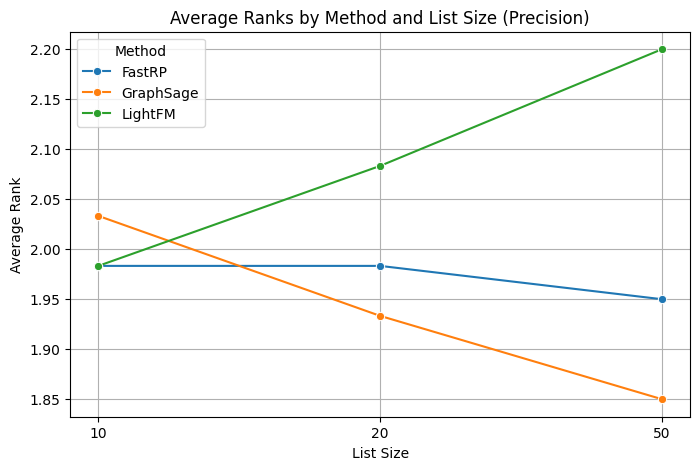

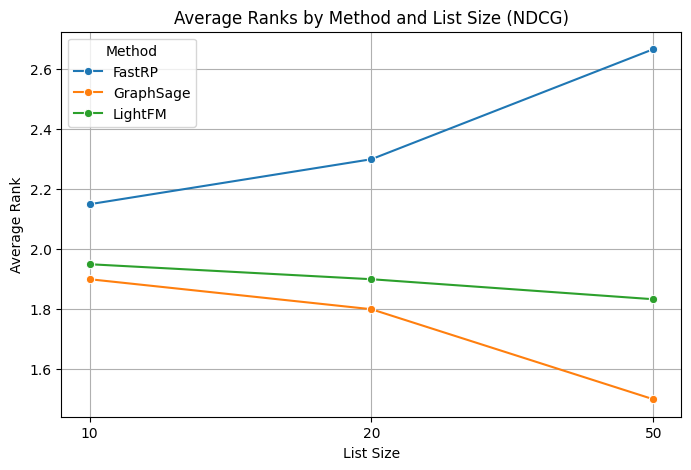

In [44]:
# Recalculate average ranks if not already available in the environment
# (This is a safeguard if the previous cell output is not directly accessible)

# Calculate average ranks for Precision
average_ranks_precision_list = []
for list_size in precision_df['ListSize'].unique():
    subset_df = precision_df[precision_df['ListSize'] == list_size]
    reshaped_df = subset_df.pivot(index='ItemID', columns='Method', values='Precision')
    ranked_df = reshaped_df.rank(axis=1, method='average')
    average_ranks = ranked_df.mean().reset_index()
    average_ranks['ListSize'] = list_size
    average_ranks['Metric'] = 'Precision'
    average_ranks_precision_list.append(average_ranks)

average_ranks_precision_df = pd.concat(average_ranks_precision_list)
average_ranks_precision_df.columns = ['Method', 'AverageRank', 'ListSize', 'Metric']


# Calculate average ranks for NDCG
average_ranks_ndcg_list = []
for list_size in ndcg_df['ListSize'].unique():
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]
    reshaped_df = subset_df.pivot(index='ItemID', columns='Method', values='NDCG')
    ranked_df = reshaped_df.rank(axis=1, method='average')
    average_ranks = ranked_df.mean().reset_index()
    average_ranks['ListSize'] = list_size
    average_ranks['Metric'] = 'NDCG'
    average_ranks_ndcg_list.append(average_ranks)

average_ranks_ndcg_df = pd.concat(average_ranks_ndcg_list)
average_ranks_ndcg_df.columns = ['Method', 'AverageRank', 'ListSize', 'Metric']

# Ensure ListSize is treated as a categorical variable for correct plotting order
average_ranks_precision_df['ListSize'] = pd.Categorical(average_ranks_precision_df['ListSize'], categories=['10', '20', '50'], ordered=True)
average_ranks_ndcg_df['ListSize'] = pd.Categorical(average_ranks_ndcg_df['ListSize'], categories=['10', '20', '50'], ordered=True)


# Create the line plot for Average Ranks (Precision)
plt.figure(figsize=(8, 5))
sns.lineplot(data=average_ranks_precision_df, x='ListSize', y='AverageRank', hue='Method', marker='o')

plt.title('Average Ranks by Method and List Size (Precision)')
plt.xlabel('List Size')
plt.ylabel('Average Rank')
plt.grid(True)
plt.show()

# Create the line plot for Average Ranks (NDCG)
plt.figure(figsize=(8, 5))
sns.lineplot(data=average_ranks_ndcg_df, x='ListSize', y='AverageRank', hue='Method', marker='o')

plt.title('Average Ranks by Method and List Size (NDCG)')
plt.xlabel('List Size')
plt.ylabel('Average Rank')
plt.grid(True)
plt.show()

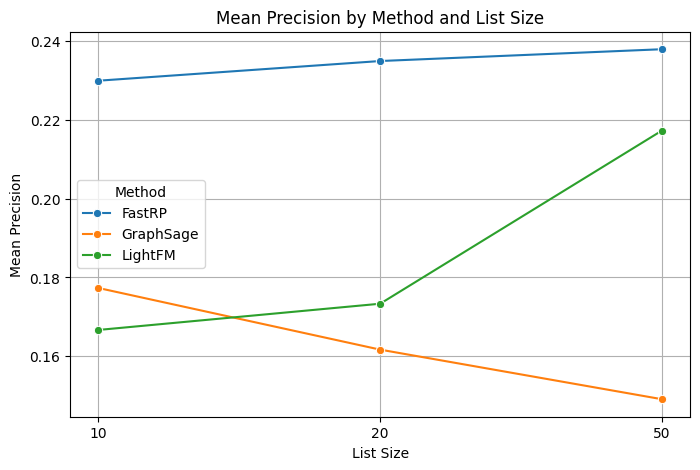

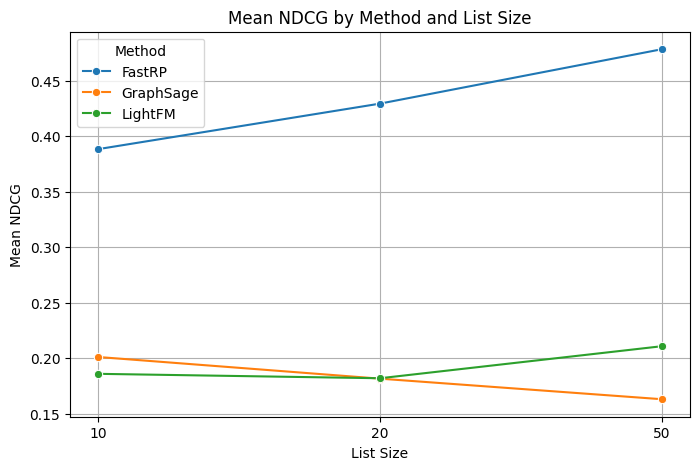

In [45]:
# Calculate raw means for Precision
mean_precision_list = []
for list_size in precision_df['ListSize'].unique():
    subset_df = precision_df[precision_df['ListSize'] == list_size]
    mean_values = subset_df.groupby('Method')['Precision'].mean().reset_index()
    mean_values['ListSize'] = list_size
    mean_values['Metric'] = 'Precision'
    mean_precision_list.append(mean_values)

mean_precision_df = pd.concat(mean_precision_list)
mean_precision_df.columns = ['Method', 'MeanValue', 'ListSize', 'Metric']


# Calculate raw means for NDCG
mean_ndcg_list = []
for list_size in ndcg_df['ListSize'].unique():
    subset_df = ndcg_df[ndcg_df['ListSize'] == list_size]
    mean_values = subset_df.groupby('Method')['NDCG'].mean().reset_index()
    mean_values['ListSize'] = list_size
    mean_values['Metric'] = 'NDCG'
    mean_ndcg_list.append(mean_values)

mean_ndcg_df = pd.concat(mean_ndcg_list)
mean_ndcg_df.columns = ['Method', 'MeanValue', 'ListSize', 'Metric']

# Ensure ListSize is treated as a categorical variable for correct plotting order
mean_precision_df['ListSize'] = pd.Categorical(mean_precision_df['ListSize'], categories=['10', '20', '50'], ordered=True)
mean_ndcg_df['ListSize'] = pd.Categorical(mean_ndcg_df['ListSize'], categories=['10', '20', '50'], ordered=True)


# Create the line plot for Raw Means (Precision)
plt.figure(figsize=(8, 5))
sns.lineplot(data=mean_precision_df, x='ListSize', y='MeanValue', hue='Method', marker='o')

plt.title('Mean Precision by Method and List Size')
plt.xlabel('List Size')
plt.ylabel('Mean Precision')
plt.grid(True)
plt.show()

# Create the line plot for Raw Means (NDCG)
plt.figure(figsize=(8, 5))
sns.lineplot(data=mean_ndcg_df, x='ListSize', y='MeanValue', hue='Method', marker='o')

plt.title('Mean NDCG by Method and List Size')
plt.xlabel('List Size')
plt.ylabel('Mean NDCG')
plt.grid(True)
plt.show()